In [2]:
import re

# Exercise #1
def is_allowed_specific_char(str: str) -> bool:
    # Uses re.compile function to compile a regular expression pattern.
    # Hypen (-) is used to specify a range of characters.
    # Brackets [] are used to define a character class. A character class allows you to specify a set of characters that you want to match at a particular position in the input string.
    charRe = re.compile(r'[^a-zA-Z0-9] ')
    valid = charRe.search(str)
    return not bool(valid)

is_allowed_specific_char('Hello World&')


# Exercise #2-3
def match_string_followed_by_zero(str: str) -> bool:
    # ^ - This is called the caret symbol and it represents the start of a line or string. In the context of the regular expression, it indicates that the pattern should match at the beginning of the line or string.

    # a - This is a literal character and it simply matches the letter 'a' exactly as it appears.

    # (b*) or `()` - Capturing group. The parentheses define a group, and the b* inside the parentheses is a sub-pattern. The b* means that it matches zero or more occurrences of the letter 'b'. The purpose of the capturing group is to capture the matched substring for later use.

    # $ - This is called the dollar sign and it represents the end of a line or string. In the context of the regular expression, it indicates that the pattern should match at the end of the line or string.
    

    # For zero or more `b's`
    charRe = re.compile(r'^a(b*)$')

    # For one or more `b's`
    # charRe = re.compile(r'^a(b+)$')

    # Zero or exactly one `b`
    # charRe = re.compile(r'^a(b?)$')

    # Zero or exactly two `b's`
    # charRe = re.compile(r'^a(b{2})$')

    # Sequences of lowercase letters joined by an underscore
    # '+' - This is a quantifier that matches one or more occurrences of the preceding pattern. In this regular expression, it is applied to [a-z], so it matches one or more lowercase letters.
    # '*' - This is a quantifier that matches zero or more occurrences of the preceding pattern. In this regular expression, it is applied to (_[a-z]+), so it matches zero or more sequences of an underscore followed by one or more lowercase letters.

    # charRe = re.compile(r'^[a-z]+(_[a-z]+)*$')

    charRe = re.compile(r'^[A-Z]+[a-z]+$')

    valid = charRe.search(str)
    return not bool(valid)
    


In [3]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

Source:

- https://nbviewer.org/github/swechhasingh/nlp-from-scratch/blob/main/bigram-LM.ipynb
- https://github.com/karpathy/makemore
- https://github.com/lionelmessi6410/Neural-Networks-from-Scratch
- https://nthu-datalab.github.io/ml/index.html

Designing a machine learning system is a multi-step process:

- Defining the problem
- Data collection and pre-processing
- Modelling and Training
- Evaluation of the model
- Deployment of the model


# Models


## Bi-gram count based model

**Goal**: Creating a machine learning system which can generate new _plausible_ English names for a person


## Data Collection


In [4]:
names_df = None
with open('datasets/names.txt') as f:
    names_df = f.read().splitlines()    

print(names_df[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [5]:
# Exploring the dataset
# Size of the dataset
print('Number of names:', len(names_df))    

# Longest Name and Shortest Name
lengths = [len(name) for name in names_df]
print(f"Longest name: {names_df[lengths.index(max(lengths))]} ({max(lengths)})")

Number of names: 32033
Longest name: muhammadibrahim (15)


In [6]:
# Creating a character vocabulary
char_vocab = ['.'] + sorted(set(''.join(names_df)))
chartoi, itochar = {}, {}
for i, char in enumerate(char_vocab): 
    chartoi[char] = i
    itochar[i] = char

In [7]:
bigrams = dict()
total_bigrams = 0
for i, name in enumerate(names_df):
    # string to list of characters in the given string
    chars = ['.'] + list(name)+ ['.']
    # cool way to generate bigrams of a word in python
    for char1, char2 in zip(chars[:-1], chars[1:]):
        bigrams[(char1, char2)] = bigrams.get((char1, char2), 0) + 1
        total_bigrams += 1

    if i == 0:
        print(f"First word: {name}\n{chars=}\n{bigrams=}")

# Results
print(f"Number of unique characters: {len(char_vocab)}")
print(f"Number of unique bigrams: {len(bigrams)}")
print(f"Total number of bigrams: {total_bigrams}")

bigrams = dict(sorted(bigrams.items(), reverse=True, key=lambda x: x[1]))
print(bigrams.items())

# In Python, the asterisk (*) is used as the unpacking operator. When used in a function definition, it allows a function to accept a variable number of arguments.
# Creates a list first of the bigrams and then unpacks the bigram tuple to get the characters and the count
# Reverse sorts the bigrams by count, therefore the most common bigrams are at the beginning of the list
print(f"Most common bigrams: {[(*[ch for ch in x[0]], x[1]) for x in sorted(bigrams.items(), reverse=True, key=lambda x: x[1])][:5]}")

First word: emma
chars=['.', 'e', 'm', 'm', 'a', '.']
bigrams={('.', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '.'): 1}
Number of unique characters: 27
Number of unique bigrams: 627
Total number of bigrams: 228146
dict_items([(('n', '.'), 6763), (('a', '.'), 6640), (('a', 'n'), 5438), (('.', 'a'), 4410), (('e', '.'), 3983), (('a', 'r'), 3264), (('e', 'l'), 3248), (('r', 'i'), 3033), (('n', 'a'), 2977), (('.', 'k'), 2963), (('l', 'e'), 2921), (('e', 'n'), 2675), (('l', 'a'), 2623), (('m', 'a'), 2590), (('.', 'm'), 2538), (('a', 'l'), 2528), (('i', '.'), 2489), (('l', 'i'), 2480), (('i', 'a'), 2445), (('.', 'j'), 2422), (('o', 'n'), 2411), (('h', '.'), 2409), (('r', 'a'), 2356), (('a', 'h'), 2332), (('h', 'a'), 2244), (('y', 'a'), 2143), (('i', 'n'), 2126), (('.', 's'), 2055), (('a', 'y'), 2050), (('y', '.'), 2007), (('e', 'r'), 1958), (('n', 'n'), 1906), (('y', 'n'), 1826), (('k', 'a'), 1731), (('n', 'i'), 1725), (('r', 'e'), 1697), (('.', 'd'), 1690), (('i', 'e'), 165

<class 'torch.Tensor'>


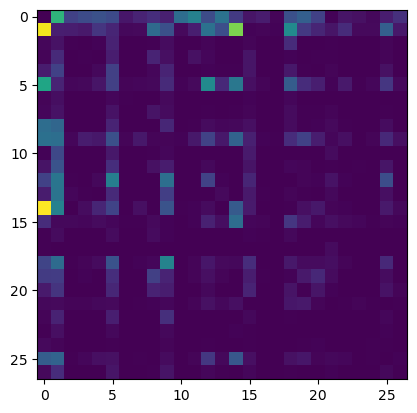

In [8]:
# Visualizing the bigrams
# 27 x 27 matrix
count_table = torch.zeros(len(char_vocab), len(char_vocab))

for bigram, count in bigrams.items():  # Fix: iterate over items() of bigrams
    char1, char2 = bigram
    count_table[chartoi[char1], chartoi[char2]] = count

plt.imshow(count_table)

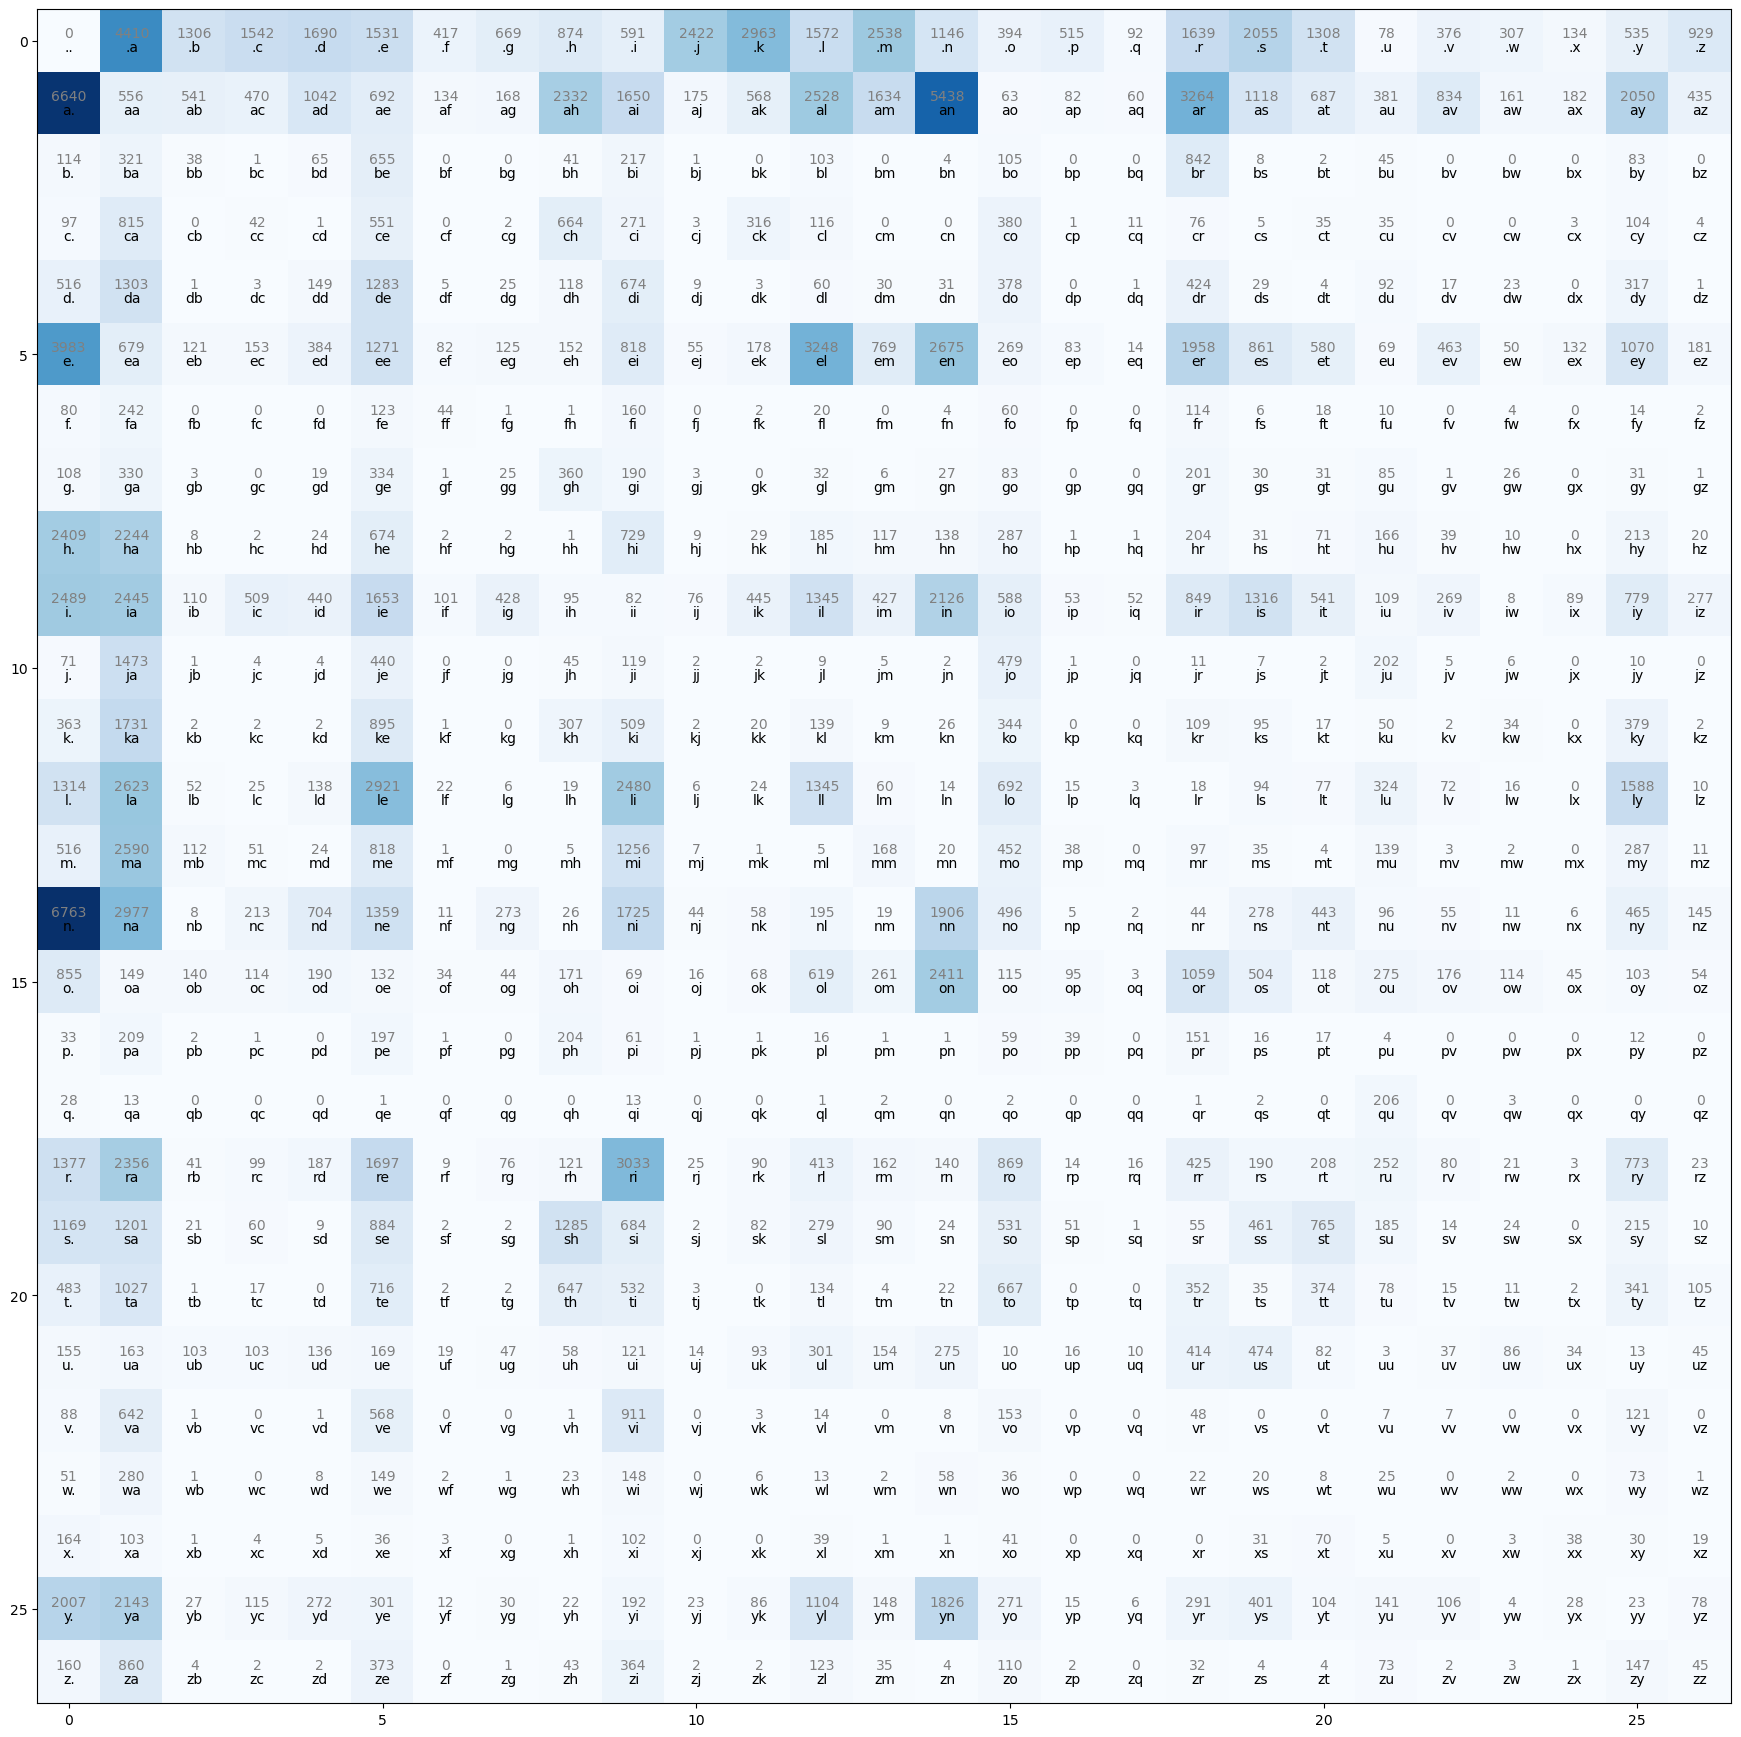

In [24]:
plt.figure(figsize=(22, 22))
plt.imshow(count_table, cmap='Blues')

# i, j are the row and column indices of the matrix
for i in range(len(char_vocab)): 
    for j in range(len(char_vocab)):
        # j: columns (x-axis)
        # i: rows (y-axis)
        # text() function is used to add text to the axes at the specified location.
        plt.text(j, i, int(count_table[i, j]), ha='center', va='bottom', color='gray') 
        plt.text(j, i, f"{itochar[i]}{itochar[j]}", ha='center', va='top', color='black')

## Modeling

Given current character, predict what would be the next character.

**Baseline**: A simple baseline model would be: given a character, if all characters have equal probability (1/27=0.037) of occuring as the next character.

**Proposed model**: Learn the probability distribution over all the characters (entire vocabulary) given a character. There are two ways to use this probability distribution to predict the next character given a character:

- Predict the character with maximum probablity, but this would generate only one word for a fixed starting character.
- Sampling from the probability distribution will solve the above problem; now, for a fixed starting character, we can generate many different words because every time, a different character will be sampled from the distribution (with replacement).

`count_table[x,:]` gives a probability distribution over all the characters as the next character given character x


In [28]:
probs = count_table / count_table.sum(dim=-1, keepdim=True) # -1 is the last dimension
assert (probs[11] == count_table[11]/count_table[11].sum()).all()
assert (probs.sum(dim=-1).round() == torch.ones(len(char_vocab))).all()

In [25]:
# Default size is 1D
print(torch.ones(len(char_vocab)))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1.])


## Generation

This probability table can be used to generate new plausible English names.<br><br>
`Row count_table[x,:]`: Probability distribution over all the characters as the next character given character x is a categorical distribution (aka multinoulli distribution, a special case of the multinomial distribution) over vocab_size(27) categories (character).
Generating new plausible English names using the above probs table


In [26]:
# Generating Names
g = torch.Generator().manual_seed(2147483647)

for idx in range(10): 
    curr_char = '.'
    curr_word = ''
    while True: 
        next_char_ix = torch.multinomial(probs[chartoi[curr_char]], num_samples=1, replacement=True, generator=g).item()
        curr_char = itochar[next_char_ix]
        curr_word += curr_char
        if curr_char == '.': 
            print(curr_word)
            break; 



cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


# Creating a Unigram Model


In [11]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
from collections import defaultdict 

tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")
word_freqs = defaultdict(lambda: 0)

/opt/homebrew/Caskroom/miniconda/base/envs/course-nlp--env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
corpus = [
    "This is the Hugging Face Course.",
    "This chapter is about tokenization.",
    "This section shows several tokenizer algorithms.",
    "Hopefully, you will be able to understand how they are trained and generate tokens.",
]

for text in corpus: 
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)  
    new_words = [word for word, offset in words_with_offsets]
    for words in new_words: 
        word_freqs[words] += 1

print(word_freqs)

defaultdict(<function <lambda> at 0x292cb5940>, {'▁This': 3, '▁is': 2, '▁the': 1, '▁Hugging': 1, '▁Face': 1, '▁Course.': 1, '▁chapter': 1, '▁about': 1, '▁tokenization.': 1, '▁section': 1, '▁shows': 1, '▁several': 1, '▁tokenizer': 1, '▁algorithms.': 1, '▁Hopefully,': 1, '▁you': 1, '▁will': 1, '▁be': 1, '▁able': 1, '▁to': 1, '▁understand': 1, '▁how': 1, '▁they': 1, '▁are': 1, '▁trained': 1, '▁and': 1, '▁generate': 1, '▁tokens.': 1})
